In [1]:
#Librerias

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import a_funciones as funciones
import joblib
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot
from sklearn.model_selection import RandomizedSearchCV

### **Lectura de datos para modelado**

In [2]:
df_models = pd.read_csv('data//df_employees_models.csv')
df_models.head()

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,...,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,retirementType,resignationReason,Attrition
0,1,2015,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Married,...,0,6,0,3,4,2,3,Not Applicable,Not Applicable,0
1,1,2016,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Married,...,0,6,0,3,4,2,3,Not Applicable,Not Applicable,0
2,2,2015,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Single,...,1,3,1,3,2,4,2,Resignation,Others,1
3,3,2015,32,Travel_Frequently,Research & Development,17,4,Other,4,Married,...,3,2,0,2,2,1,3,Not Applicable,Not Applicable,0
4,3,2016,32,Travel_Frequently,Research & Development,17,4,Other,4,Married,...,3,2,0,2,2,1,3,Not Applicable,Not Applicable,0


In [3]:
df_models = df_models.sort_values(by='Year')

In [4]:
# Eliminación de 'retirementType' y 'resignationReason' ya que arrojan las misma información que la variable objetivo
df_models.drop('retirementType', axis=1, inplace=True)
df_models.drop('resignationReason', axis=1, inplace=True)

In [6]:
df_models

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Attrition
0,1,2015,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Married,...,1,11,0,6,0,3,4,2,3,0
4612,2513,2015,34,Travel_Rarely,Research & Development,2,3,Life Sciences,2,Married,...,1,14,0,5,4,2,3,3,2,0
4610,2512,2015,40,Travel_Rarely,Sales,27,2,Medical,3,Divorced,...,4,18,0,3,0,3,4,3,3,0
4609,2511,2015,46,Travel_Rarely,Research & Development,10,3,Medical,1,Married,...,4,11,1,2,3,4,2,4,3,1
4608,2510,2015,26,Travel_Rarely,Human Resources,2,1,Technical Degree,3,Married,...,0,15,2,3,1,4,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,713,2016,27,Travel_Rarely,Research & Development,2,3,Life Sciences,2,Married,...,8,18,0,2,0,3,4,3,3,0
5713,3106,2016,30,Non-Travel,Research & Development,2,4,Life Sciences,3,Married,...,0,15,1,2,7,3,1,3,3,0
3570,1942,2016,35,Travel_Rarely,Research & Development,6,4,Medical,1,Divorced,...,1,19,2,3,10,3,3,2,3,0
1302,712,2016,48,Travel_Rarely,Research & Development,2,1,Life Sciences,2,Single,...,1,20,0,2,0,4,4,3,2,0


In [7]:
df_models.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8820 entries, 0 to 8819
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               8820 non-null   int64 
 1   Year                     8820 non-null   int64 
 2   Age                      8820 non-null   int64 
 3   BusinessTravel           8820 non-null   object
 4   Department               8820 non-null   object
 5   DistanceFromHome         8820 non-null   int64 
 6   Education                8820 non-null   int64 
 7   EducationField           8820 non-null   object
 8   JobLevel                 8820 non-null   int64 
 9   MaritalStatus            8820 non-null   object
 10  MonthlyIncome            8820 non-null   int64 
 11  NumCompaniesWorked       8820 non-null   int64 
 12  PercentSalaryHike        8820 non-null   int64 
 13  StockOptionLevel         8820 non-null   int64 
 14  TrainingTimesLastYear    8820 non-null   int6

In [5]:
# Separación de variables categoricas
list_cat=['BusinessTravel','Department','EducationField','MaritalStatus']

In [6]:
# Lista de dummies
list_dummies=['BusinessTravel','Department','EducationField','MaritalStatus']

In [7]:
# Separación de variable objetivo y datos de entrenamiento (2015)
y_train = df_models[df_models['Year']==2015]['Attrition']
X_train = df_models[df_models['Year']==2015].drop('Attrition', axis=1)

In [10]:
y_train

0       0
4612    0
4610    0
4609    1
4608    1
       ..
2384    0
2778    0
2619    0
2409    0
2773    1
Name: Attrition, Length: 4410, dtype: int64

In [8]:
X_train.head()

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,1,2015,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Married,131160,1,11,0,6,0,3,4,2,3
4612,2513,2015,34,Travel_Rarely,Research & Development,2,3,Life Sciences,2,Married,53430,1,14,0,5,4,2,3,3,2
4610,2512,2015,40,Travel_Rarely,Sales,27,2,Medical,3,Divorced,102740,4,18,0,3,0,3,4,3,3
4609,2511,2015,46,Travel_Rarely,Research & Development,10,3,Medical,1,Married,44220,4,11,1,2,3,4,2,4,3
4608,2510,2015,26,Travel_Rarely,Human Resources,2,1,Technical Degree,3,Married,65780,0,15,2,3,1,4,2,3,2


In [8]:
# Separación datos de test o datos a utilizar para la predicción de los empleados que se retirarían en 2017
X_test = df_models[df_models['Year']==2016].drop('Attrition', axis=1)

In [13]:
X_test

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
7276,3960,2016,46,Travel_Rarely,Sales,3,4,Marketing,1,Divorced,42720,7,13,0,3,2,3,4,3,4
448,243,2016,32,Travel_Rarely,Research & Development,1,1,Life Sciences,1,Married,30220,1,16,1,3,0,1,4,2,3
309,167,2016,57,Travel_Rarely,Research & Development,2,2,Life Sciences,4,Divorced,63060,3,12,1,3,0,1,4,2,3
7260,3951,2016,53,Non-Travel,Research & Development,10,4,Medical,2,Married,20700,4,13,2,2,0,1,3,2,4
3101,1686,2016,49,Travel_Rarely,Sales,21,1,Life Sciences,1,Divorced,40110,1,18,2,2,0,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,713,2016,27,Travel_Rarely,Research & Development,2,3,Life Sciences,2,Married,48510,8,18,0,2,0,3,4,3,3
5713,3106,2016,30,Non-Travel,Research & Development,2,4,Life Sciences,3,Married,51310,0,15,1,2,7,3,1,3,3
3570,1942,2016,35,Travel_Rarely,Research & Development,6,4,Medical,1,Divorced,119960,1,19,2,3,10,3,3,2,3
1302,712,2016,48,Travel_Rarely,Research & Development,2,1,Life Sciences,2,Single,28190,1,20,0,2,0,4,4,3,2


In [9]:
# Eliminación de la columna 'Year' dado que ya se realizó la separación
X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

In [15]:
X_train

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,1,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Married,131160,1,11,0,6,0,3,4,2,3
4612,2513,34,Travel_Rarely,Research & Development,2,3,Life Sciences,2,Married,53430,1,14,0,5,4,2,3,3,2
4610,2512,40,Travel_Rarely,Sales,27,2,Medical,3,Divorced,102740,4,18,0,3,0,3,4,3,3
4609,2511,46,Travel_Rarely,Research & Development,10,3,Medical,1,Married,44220,4,11,1,2,3,4,2,4,3
4608,2510,26,Travel_Rarely,Human Resources,2,1,Technical Degree,3,Married,65780,0,15,2,3,1,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,1298,56,Travel_Rarely,Human Resources,2,1,Medical,2,Single,26440,4,11,1,2,0,4,4,2,3
2778,1512,51,Travel_Rarely,Research & Development,2,3,Life Sciences,2,Divorced,56750,5,13,0,2,1,4,2,3,2
2619,1425,27,Travel_Frequently,Research & Development,18,2,Medical,1,Single,65160,1,19,1,4,0,4,3,3,3
2409,1311,58,Travel_Rarely,Research & Development,8,4,Life Sciences,2,Single,29720,0,14,0,2,1,4,3,2,4


In [10]:
# Formato dummies de train (2015)
X_train_dummies = pd.get_dummies(X_train, columns=list_cat, drop_first=True)

In [17]:
X_train_dummies

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,1,51,6,2,1,131160,1,11,0,6,...,True,False,True,True,False,False,False,False,True,False
4612,2513,34,2,3,2,53430,1,14,0,5,...,True,True,False,True,False,False,False,False,True,False
4610,2512,40,27,2,3,102740,4,18,0,3,...,True,False,True,False,False,True,False,False,False,False
4609,2511,46,10,3,1,44220,4,11,1,2,...,True,True,False,False,False,True,False,False,True,False
4608,2510,26,2,1,3,65780,0,15,2,3,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,1298,56,2,1,2,26440,4,11,1,2,...,True,False,False,False,False,True,False,False,False,True
2778,1512,51,2,3,2,56750,5,13,0,2,...,True,True,False,True,False,False,False,False,False,False
2619,1425,27,18,2,1,65160,1,19,1,4,...,False,True,False,False,False,True,False,False,False,True
2409,1311,58,8,4,2,29720,0,14,0,2,...,True,True,False,True,False,False,False,False,False,True


In [11]:
# Convertir False a 0 y True a 1
X_train_dummies = X_train_dummies.replace({True: 1, False: 0})

In [19]:
X_train_dummies.head()

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,1,51,6,2,1,131160,1,11,0,6,...,1,0,1,1,0,0,0,0,1,0
4612,2513,34,2,3,2,53430,1,14,0,5,...,1,1,0,1,0,0,0,0,1,0
4610,2512,40,27,2,3,102740,4,18,0,3,...,1,0,1,0,0,1,0,0,0,0
4609,2511,46,10,3,1,44220,4,11,1,2,...,1,1,0,0,0,1,0,0,1,0
4608,2510,26,2,1,3,65780,0,15,2,3,...,1,0,0,0,0,0,0,1,1,0


In [12]:
# Exclusión de la columna 'EmployeeID'
X1= X_train_dummies.loc[:,~X_train_dummies.columns.isin(['EmployeeID'])]

In [13]:
# Escalado de datos de train (2015)
scaler=StandardScaler()
scaler.fit(X1)
X_std=scaler.transform(X1)
X_train_std=pd.DataFrame(X_std,columns=X1.columns)
X_train_std

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,...,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,1.541369,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,2.483396,-0.679146,...,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.088232,-0.685565
1,-0.320163,-0.887515,0.085049,-0.057788,-0.246461,-0.678464,-0.330589,-0.932014,1.707500,0.562576,...,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.088232,-0.685565
2,0.336849,2.197341,-0.891688,0.845911,0.801272,0.524602,0.762698,-0.932014,0.155707,-0.679146,...,0.639841,-1.374051,1.515244,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.918921,-0.685565
3,0.993860,0.099639,0.085049,-0.961486,-0.442153,0.524602,-1.150554,0.241988,-0.620189,0.252146,...,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,1.088232,-0.685565
4,-1.196177,-0.887515,-1.868426,0.845911,0.015950,-1.079486,-0.057267,1.415991,0.155707,-0.368715,...,0.639841,-1.374051,-0.659960,-0.837490,-0.348255,-0.679141,-0.243059,3.183766,1.088232,-0.685565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,2.088878,-0.887515,-1.868426,-0.057788,-0.819941,0.524602,-1.150554,0.241988,-0.620189,-0.679146,...,0.639841,-1.374051,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.918921,1.458650
4406,1.541369,-0.887515,0.085049,-0.057788,-0.175918,0.925624,-0.603911,-0.932014,-0.620189,-0.368715,...,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.918921,-0.685565
4407,-1.086676,1.086793,-0.891688,-0.961486,0.002777,-0.678464,1.036019,0.241988,0.931603,-0.679146,...,-1.562889,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.918921,1.458650
4408,2.307882,-0.147150,1.061787,-0.057788,-0.750248,-1.079486,-0.330589,-0.932014,-0.620189,-0.368715,...,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.918921,1.458650


### **Selección de variables**

A través del método de tanteo, se define un threshold de 0.1, la cual selecciona 19 variables. En cada tanteo se variaba el threshold y se medía la precisión que generaba, obteniendo precisión superior con random forest con 19 variables (selección de variables). Así mismo, se evidenció que si se usa la media como threshold arroja un resultado similar (17 variables).

In [14]:
# Selección de variables utilizando la función 'sel_variables'
mcla = LogisticRegression()
mdtc= DecisionTreeClassifier()
mrfc= RandomForestClassifier()
mgbc=GradientBoostingClassifier()
modelos= [mcla, mdtc, mrfc, mgbc]
var_names=funciones.sel_variables(modelos, X_train_std, y_train, threshold=0.1)
var_names.shape

(19,)

In [15]:
X2=X_train_std[var_names] ### matriz con variables seleccionadas
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   float64
 1   BusinessTravel_Travel_Frequently   4410 non-null   float64
 2   BusinessTravel_Travel_Rarely       4410 non-null   float64
 3   Department_Research & Development  4410 non-null   float64
 4   Department_Sales                   4410 non-null   float64
 5   EducationField_Life Sciences       4410 non-null   float64
 6   EducationField_Marketing           4410 non-null   float64
 7   EducationField_Medical             4410 non-null   float64
 8   EducationField_Other               4410 non-null   float64
 9   EducationField_Technical Degree    4410 non-null   float64
 10  EnvironmentSatisfaction            4410 non-null   float64
 11  JobSatisfaction                    4410 non-null   float

In [ ]:
X_train_std.info()

In [16]:
# Ejecución de modelos y cálculo de la precisión a través de la función 'medir_modelos'
precision_df_original=funciones.medir_modelos(modelos,"precision",X_train_std,y_train,10) ## base con todas las variables 
precision_varsel=funciones.medir_modelos(modelos,"precision",X2,y_train,10) ### base con variables seleccionadas

In [17]:
# Visualización de la métrica
pd.set_option('display.float_format', lambda x: '%.4f' % x)
precision=pd.concat([precision_df_original,precision_varsel],axis=1)
precision.columns=['rl', 'dt', 'rf', 'gb',
       'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']
precision

,rl,dt,rf,gb,rl_Sel,dt_sel,rf_sel,gb_Sel
0,0.8750,0.9750,1.0000,0.9231,0.8750,1.0000,1.0000,0.7647
1,0.4545,1.0000,1.0000,0.8333,0.4444,1.0000,1.0000,0.8182
2,0.8750,1.0000,1.0000,0.9545,0.8571,1.0000,1.0000,1.0000
3,0.5556,0.8667,0.8667,0.9167,0.6667,0.8667,0.8667,0.8077
4,0.6250,0.5517,0.5565,0.6579,0.6250,0.5565,0.5565,0.6000
5,0.5714,0.9848,1.0000,0.9412,0.5714,1.0000,1.0000,1.0000
6,0.6154,0.9831,1.0000,0.9130,0.6667,1.0000,1.0000,0.9091
7,1.0000,1.0000,1.0000,0.8889,1.0000,1.0000,1.0000,0.8667
8,0.6364,0.9701,1.0000,1.0000,0.6000,0.9848,1.0000,1.0000
9,0.5000,0.9565,1.0000,0.7692,0.5455,0.9583,1.0000,0.8333


In [18]:
np.mean(precision, axis=0)

rl       0.6708
dt       0.9288
rf       0.9423
gb       0.8798
rl_Sel   0.6852
dt_sel   0.9366
rf_sel   0.9423
gb_Sel   0.8600
dtype: float64

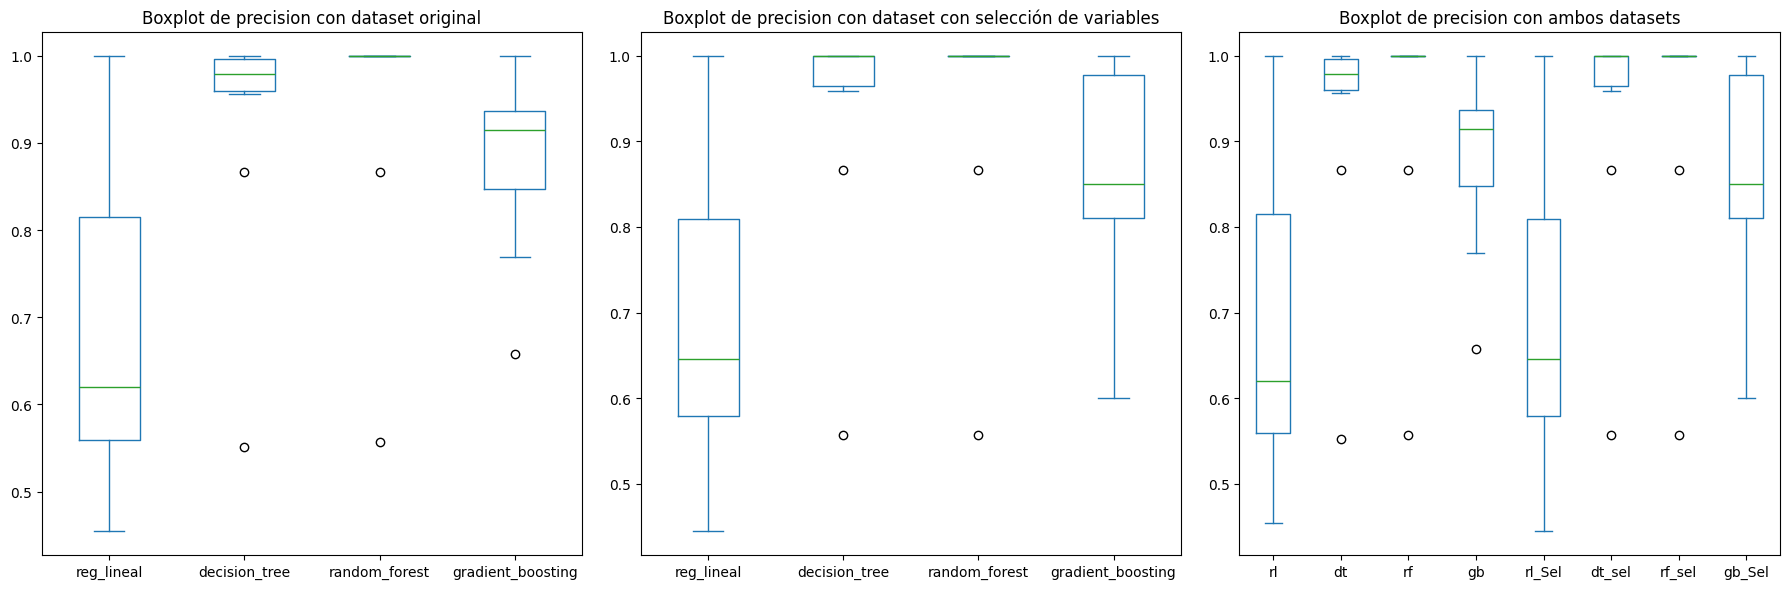

In [19]:
import matplotlib.pyplot as plt

# Crear una figura con 1 fila y 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Primer gráfico
precision_df_original.plot(kind='box', ax=axs[0], title='Boxplot de precision con dataset original')

# Segundo gráfico
precision_varsel.plot(kind='box', ax=axs[1], title='Boxplot de precision con dataset con selección de variables')

# Tercer gráfico
precision.plot(kind='box', ax=axs[2], title='Boxplot de precision con ambos datasets')

# Ajustar el espaciado entre gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

Del gráfico anterior y la impresión de la precisión, se concluye entonces que el modelo que mejor precisión arroja es **Random Forest**. Así mismo, se obtiene una precisión similar con ambos datasets (original y con selección de variables).

### **Optimización de hiperparámetros**

In [77]:
#mrfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [146]:
#param_grid = [{'n_estimators': [20, 50, 100, 250], 'max_features': [5,20,50,200],
#               'min_samples_split': [100, 20, 5, 2], 'class_weight':["balanced",None],
#               'bootstrap': [True, False], 'max_depth': [5, 10, 100, 500, None], 'n_jobs': [-1], 'criterion':["gini","entropy"]}]

In [147]:
#tun_rf=RandomizedSearchCV(mrfc,param_distributions=param_grid,n_iter=10,scoring="precision")
#tun_rf.fit(X2,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions=[{'bootstrap': [True, False],
                                         'class_weight': ['balanced', None],
                                         'criterion': ['gini', 'entropy'],
                                         'max_depth': [5, 10, 100, 500, None],
                                         'max_features': [5, 20, 50, 200],
                                         'min_samples_split': [100, 20, 5, 2],
                                         'n_estimators': [20, 50, 100, 250],
                                         'n_jobs': [-1]}],
                   scoring='precision')

In [148]:
#pd.set_option('display.max_colwidth', 100)
#resultados=tun_rf.cv_results_
#tun_rf.best_params_
#pd_resultados=pd.DataFrame(resultados)

In [149]:
#pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
7,"{'n_jobs': -1, 'n_estimators': 250, 'min_samples_split': 100, 'max_features': 5, 'max_depth': 50...",0.9667
1,"{'n_jobs': -1, 'n_estimators': 250, 'min_samples_split': 5, 'max_features': 5, 'max_depth': 500,...",0.9289
2,"{'n_jobs': -1, 'n_estimators': 250, 'min_samples_split': 5, 'max_features': 200, 'max_depth': 50...",0.9289
5,"{'n_jobs': -1, 'n_estimators': 250, 'min_samples_split': 2, 'max_features': 200, 'max_depth': 50...",0.9289
6,"{'n_jobs': -1, 'n_estimators': 20, 'min_samples_split': 100, 'max_features': 5, 'max_depth': 10,...",0.9157
8,"{'n_jobs': -1, 'n_estimators': 50, 'min_samples_split': 5, 'max_features': 200, 'max_depth': 500...",0.8788
9,"{'n_jobs': -1, 'n_estimators': 50, 'min_samples_split': 100, 'max_features': 200, 'max_depth': N...",0.8515
4,"{'n_jobs': -1, 'n_estimators': 20, 'min_samples_split': 5, 'max_features': 5, 'max_depth': 10, '...",0.8130
3,"{'n_jobs': -1, 'n_estimators': 20, 'min_samples_split': 20, 'max_features': 20, 'max_depth': 10,...",0.7071
0,"{'n_jobs': -1, 'n_estimators': 50, 'min_samples_split': 20, 'max_features': 200, 'max_depth': 5,...",0.4418


Realizando la optimización de hiperparámetros se observó que es posible aumentar levemente la precisión con el conjunto de datos con variables seleccionadas de 94,2% aproximadamente, hasta casi el 96,7%. Sin embargo, al continuar con la evaluación del modelo se observó que si se utiliza el modelo con parámetros optimizados la predecicción correcta de los 1 (empleados que se retiran) se reduce considerablemente y se aumenta el número de predicciones correctas para el valor de 0 (los empleados que no se retiran). En este caso, nos interesa más que el modelo prediga correctamente los empleados que **si** se van a retirar dado que los planes de acción se enfocan en ellos. Por ende, se decide continuar con el modelo de Random Forest sin la optimización de hiperparámetros.

### **Guardar el modelo**

In [151]:
#rf_final=tun_rf.best_estimator_

In [20]:
rf_final=mrfc ### Guardar el modelo final
rf_final=mrfc.fit(X2,y_train)

In [32]:
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# Guardar objetos para despliegue
joblib.dump(rf_final, "salidas\\rf_final.pkl") ## 
#joblib.dump(m_lreg, "salidas\\m_lreg.pkl") ## 
joblib.dump(list_cat, "salidas\\list_cat.pkl") ### para realizar imputacion
joblib.dump(list_dummies, "salidas\\list_dummies.pkl")  ### para convertir a dummies
joblib.dump(var_names, "salidas\\var_names.pkl")  ### para variables con que se entrena modelo
joblib.dump(scaler, "salidas\\scaler.pkl") ## 

['salidas\\scaler.pkl']

### **Evaluación de modelos para evitar overfitting**

In [34]:
#####Evaluar métrica de entrenamiento y evaluación para mirar sobre ajuste ####

eval=cross_validate(rf_final,X2,y_train,cv=4,scoring="precision",return_train_score=True)
eval

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

{'fit_time': array([0.40904522, 0.37686682, 0.40768719, 0.46446037]),
 'score_time': array([0.02248144, 0.02223945, 0.02163744, 0.02513266]),
 'test_score': array([1.       , 0.7264574, 1.       , 1.       ]),
 'train_score': array([0.96923077, 1.        , 0.91295938, 0.94226804])}

In [35]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para RF
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']

In [25]:
train_test_rf["train_score"].mean()

0.9592296451570769

In [36]:
train_test_rf["test_score"].mean()

0.9316143497757847

Se observa que con el proceso de cross validation se obtiene una precisión ligeramente mayor en train que en test, lo que nos permite concluir que el modelo de **Random Forest NO** presenta **sobreajuste** al utilizar el dataset con selección de variables. 

In [37]:
y_train = pd.DataFrame(y_train)

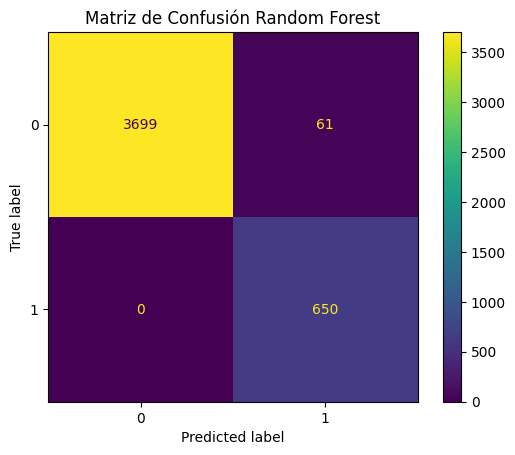

In [38]:
# Matriz de confusion
cm= confusion_matrix(y_train, rf_final.predict(X2))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title('Matriz de Confusión Random Forest')
plt.show()

Finalmente, se observa que el modelo de **Random Forest** presenta un muy buen comportamiento dado que es capaz de predecir correctamente todos los empleados que se retiran, y así mismo, predice de muy buena manera a los empleados que no se retiran (alrededor del 98% de ellos). Por otro lado, el modelo predice incorrectamente a 61 empleados como potenciales retiros que realmente no lo serán, pero en este caso (y como se mencionó anteriromente) se busca atacar y evitar la deserción de empleados, por lo que el modelo realmente es útil para la predicción de ellos.

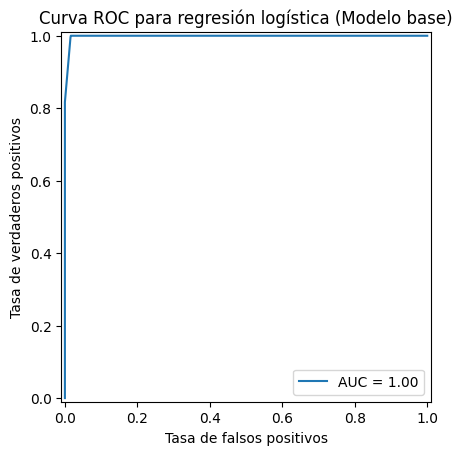

In [40]:
# Calcular las probabilidades de la clase positiva
y_prob = rf_final.predict_proba(X2)[:, 1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)

# Crear la visualización de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

# Graficar la curva ROC
roc_display.plot()

# Agregar las etiquetas de los ejes y el título
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para regresión logística (Modelo base)")
plt.show()

Análisis de curvas

### **Exportar importancia de variables para despliegue**

In [41]:
variables=rf_final.feature_names_in_
importancia = rf_final.feature_importances_
importancia

array([0.18272907, 0.02326361, 0.01472261, 0.0227877 , 0.0203243 ,
       0.02484894, 0.01161696, 0.02374693, 0.00972463, 0.00967775,
       0.06423105, 0.06541144, 0.01845953, 0.03226109, 0.17335473,
       0.08859962, 0.07119262, 0.06303413, 0.08001328])

In [42]:
# Peso de cada variable en la predicción
df = pd.DataFrame({
    'variable': variables,
    'peso': importancia
})

df.sort_values(by='peso', ascending=False)

,variable,peso
0,Age,0.1827
14,MonthlyIncome,0.1734
15,NumCompaniesWorked,0.0886
18,YearsSinceLastPromotion,0.0800
16,TrainingTimesLastYear,0.0712
11,JobSatisfaction,0.0654
10,EnvironmentSatisfaction,0.0642
17,WorkLifeBalance,0.0630
13,MaritalStatus_Single,0.0323
5,EducationField_Life Sciences,0.0248


Análisis de pesos

In [43]:
# Exportar importancia de variables como dataframe para despliegue
df.to_excel("salidas\\feature_importances.xlsx")